In [1]:
gr = {
    'A': ["B",'C'],
    'B': ["A",'D','E'],
    'C': ['A','F'],
    'D': ['B'],
    'E': ['B','F'],
    'F': ['C','E']
}

Une première fonction pour associer des indices à la représentation littérale des nœuds.

In [2]:
def indices(l):
    d = dict()
    for clef in l:
        d[clef] = ord(clef) - 65
    return d
indices([i for i in gr.keys()])

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}

In [3]:
from numpy import zeros

In [4]:
n = len(gr)

In [5]:
M = zeros((n,n))

In [6]:
M

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [7]:
def adjacence(gr):
    n = len(gr)
    M = zeros((n,n))
    indices = dict()
    for indice,nœud in enumerate(gr):
        indices[nœud] = indice
    print(indices)
    for nœud in gr:
        for dest in gr[nœud]:
            M[indices[nœud]][indices[dest]] = 1
    return M


In [8]:
adjacence(gr)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}


array([[0., 1., 1., 0., 0., 0.],
       [1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.]])

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import networkx as nx

In [10]:
G = nx.Graph()

In [11]:
for i in gr.keys():
    G.add_node(i)

In [12]:
for nœuds in gr:
    for nœuds_connectes in gr[nœuds]:
        G.add_edge(nœuds, nœuds_connectes)

/usr/lib/python3/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


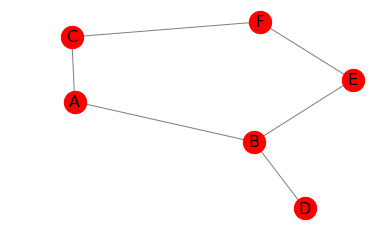

In [13]:
pos = nx.spring_layout (G)#C h o i s i une p o s i t i o n a l e a t o i r e
nx.draw_networkx_nodes (G , pos , node_color= 'r' , node_size =500)
nx.draw_networkx_edges (G , pos , width =1.0 , alpha =0.5)
nx.draw_networkx_labels (G ,pos ,font_size =16)
plt.axis ( 'off')
plt.show ( )

In [14]:
def afficher_graphe(gr):
    """
    gr est un graphe écrit sous forme d'un dictionnaire
    """
    G = nx.Graph()
    for i in gr.keys():
        G.add_node(i)
    for nœuds in gr:
        if gr[nœuds] != []:
            for nœuds_connectes in gr[nœuds]:
                G.add_edge(nœuds, nœuds_connectes)
    pos = nx.spring_layout (G)#C h o i s i une p o s i t i o n a l e a t o i r e
    nx.draw_networkx_nodes (G , pos , node_color= 'r' , node_size =500)
    nx.draw_networkx_edges (G , pos , width =1.0 , alpha =0.5)
    nx.draw_networkx_labels (G ,pos ,font_size =16)
    plt.axis ( 'off')
    plt.show ( )
    return G

### Parcours de graphe en profondeur
Création d'une fonction de parcours de graphe en profondeur

In [15]:
def dfs(gr,sommet):
    """
    Parcours du graphe gr en profondeur en partant du sommet `somme`
    """
    stack = [sommet]
    chemin = []
    visité = set()
    while stack != []:
        a = stack.pop()
        if a not in visité:
            visité.add(a)
            chemin.append(a)
            stack += [voisin for voisin in gr[a] if voisin not in visité]
    return chemin
    

In [16]:
dfs(gr, 'A')

['A', 'C', 'F', 'E', 'B', 'D']

### Parcours de graphe en largeur
On va désormais parcourir le graphe en largeur

In [17]:
def plg(gr,sommet):
    file = [sommet]
    chemin = []
    visité = set()
    while file != []:
        a = file.pop(0)
        if a not in visité:
            visité.add(a)
            chemin.append(a)
            file += [voisin for voisin in gr[a] if voisin not in visité]
    return chemin

In [18]:
plg(gr,'B')

['B', 'A', 'D', 'E', 'C', 'F']

### Parcours de graphe par l'algorithme de Dijkstra
Le titre est explicite

In [19]:
g = {'a': {'b': 4, 'c': 2},
     'b': {'a' : 4,'d': 5, 'c': 1},
     'c': {'a' : 2, 'b' : 1, 'd' : 8,'e': 10},
     'd': {'b': 5, 'c': 8, 'e': 2},
     'e': {'c': 10, 'd' : 2, 'f': 3},
     'f': {'e' : 3,'d' : 6}}

In [20]:
g['a']

{'b': 4, 'c': 2}

In [21]:
g['a']['b']

4

In [22]:
'c' in g['a']

True

In [23]:
min(g['a'], key = g['a'].get)

'c'

In [24]:
def affiche_peres(pere,depart,extremite,trajet):
    """
    À partir du dictionnaire des pères de chaque sommet on renvoie
    la liste des sommets du plus court chemin trouvé. Calcul récursif.
    On part de la fin et on remonte vers le départ du chemin.
    
    """
    if extremite == depart:
        return [depart] + trajet
    else:
        return (affiche_peres(pere, depart, pere[extremite], [extremite] + trajet))
 
def plus_court(graphe,etape,fin,visites,dist,pere,depart):
    """
    Trouve récursivement la plus courte chaine entre debut et fin avec l'algo de Dijkstra
    visites est une liste et dist et pere des dictionnaires 
    graphe  : le graphe étudié                                                               (dictionnaire)
    étape   : le sommet en cours d'étude                                                     (sommet)
    fin     : but du trajet                                                                  (sommet)
    visites : liste des sommets déjà visités                                                 (liste de sommets)
    dist    : dictionnaire meilleure distance actuelle entre départ et les sommets du graphe (dict sommet : int)
    pere    : dictionnaire des pères actuels des sommets correspondant aux meilleurs chemins (dict sommet : sommet)
    depart  : sommet global de départ                                                        (sommet)
    Retourne le couple (longueur mini (int), trajet correspondant (liste sommets)) 
       
    """
    # si on arrive à la fin, on affiche la distance et les peres
    if etape == fin:
       return dist[fin], affiche_peres(pere,depart,fin,[])
    # si c'est la première visite, c'est que l'étape actuelle est le départ : on met dist[etape] à 0
    if  len(visites) == 0 : dist[etape]=0
    # on commence à tester les voisins non visités
    for voisin in graphe[etape]:
        if voisin not in visites:
            # la distance est soit la distance calculée précédemment soit l'infini
            dist_voisin = dist.get(voisin,float('inf'))
            # on calcule la nouvelle distance calculée en passant par l'étape
            candidat_dist = dist[etape] + graphe[etape][voisin]
            # on effectue les changements si cela donne un chemin plus court
            if candidat_dist < dist_voisin:
                dist[voisin] = candidat_dist
                pere[voisin] = etape
    # on a regardé tous les voisins : le noeud entier est visité
    visites.append(etape)
    # on cherche le sommet *non visité* le plus proche du départ
    non_visites = dict((s, dist.get(s,float('inf'))) for s in graphe if s not in visites)
    noeud_plus_proche = min(non_visites, key = non_visites.get)
    # on applique récursivement en prenant comme nouvelle étape le sommet le plus proche 
    return plus_court(graphe,noeud_plus_proche,fin,visites,dist,pere,depart)

In [25]:
def dij_rec(graphe,debut,fin):
    return plus_court(graphe,debut,fin,[],{},{},debut)

In [26]:
g3 = {'a': {'d': 2, 'g': 2},
          'b': {'a' : 1}, 
          'c': {'b' : 1, 'f' : 2, 'g' : 3},
          'd': {'g': 4, 's': 7},
          'e': {'a': 5, 'b' : 3, 'c': 2},
          'f': {'d' : 1,'s' : 6},
          'g': {'f' :4},
          's':{}
    }
l3,c3 = dij_rec(g3,'e','s')
print(f'Plus court chemin ex3 : {c3} de longueur : {l3}')
g4 = {'a': {'d': 5, 'e': 7, 'b' : 2},
      'b': {'e' : 4, 'c' : 9},
      'c': {'e' : 4, 'g' : 6},
      'd': {'e': 3, 'f': 5},
      'e': {'f': 3, 'g' : 4},
      'f': {'h' : 5},
      'g': {'h' : 3},
      'h': {}
     }
l4,c4 = dij_rec(g4,'a','h')
print(f'Plus court chemin ex4 : {c4} de longueur : {l4}')
 

Plus court chemin ex3 : ['e', 'c', 'f', 's'] de longueur : 10
Plus court chemin ex4 : ['a', 'b', 'e', 'g', 'h'] de longueur : 13
